# Laboratorium 2

Wyniki są w CSV. Każda linijka zawiera:
- typ (static/dynamic/guided)
- chunk_size
- rozmiar tablicy 
- liczbę wątków
- czas obliczeń
Zrobiłem testy dla:
- static, gdy chunk_size = 1
- dynamic, chunk_size = 1
- dynamic, chunk_size = 1000
- dynamic, chunk_size = rozmiar tablicy / liczba wątków
- guided, chunks_size = 1
Wszystko zrobione dla rozmiaru tablicy 10^6, 10^7 i 10^8, dla wątków od 1 do 4 i 10 razy każdy przypadek

wszystko się liczyło na vClustrze może jakąś minutę, więc jakby coś było nie tak z danymi albo chciałbyś inne to myślę, że można spokojnie jeszcze coś pomierzyć

### Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt

### Results

In [2]:
df = pd.read_csv('./results.csv')
df

,type,chunk_size,table_size,cpu_count,time
0,static,1000000,1000000,1,0.009775
1,dynamic,1,1000000,1,0.019312
2,dynamic,1000,1000000,1,0.009710
3,dynamic,1000000,1000000,1,0.009638
4,guided,1,1000000,1,0.009603
...,...,...,...,...,...
595,static,25000000,100000000,4,0.199405
596,dynamic,1,100000000,4,2.772308
597,dynamic,1000,100000000,4,0.223689
598,dynamic,25000000,100000000,4,0.200010


<AxesSubplot:title={'center':'Time'}>

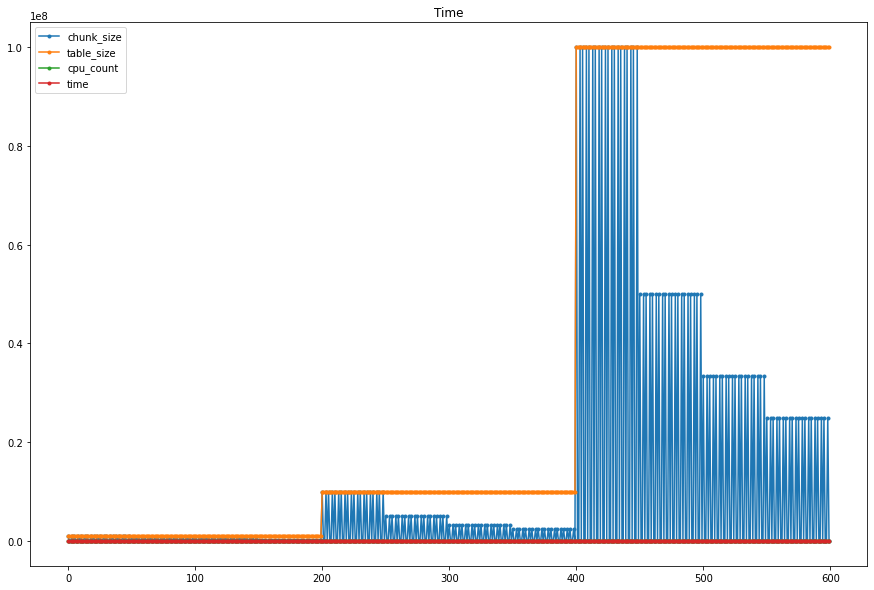

In [3]:
df.plot(figsize=(15,10), title="Time", style='.-')

In [4]:
df.sort_values(by=['type', 'chunk_size', 'cpu_count'])

,type,chunk_size,table_size,cpu_count,time
1,dynamic,1,1000000,1,0.019312
6,dynamic,1,1000000,1,0.018496
11,dynamic,1,1000000,1,0.018689
16,dynamic,1,1000000,1,0.018482
21,dynamic,1,1000000,1,0.018382
...,...,...,...,...,...
425,static,100000000,100000000,1,0.902544
430,static,100000000,100000000,1,0.901343
435,static,100000000,100000000,1,0.902250
440,static,100000000,100000000,1,0.901541


In [5]:
df = df.sort_values(["type", "chunk_size", 'cpu_count'])
df

,type,chunk_size,table_size,cpu_count,time
1,dynamic,1,1000000,1,0.019312
6,dynamic,1,1000000,1,0.018496
11,dynamic,1,1000000,1,0.018689
16,dynamic,1,1000000,1,0.018482
21,dynamic,1,1000000,1,0.018382
...,...,...,...,...,...
425,static,100000000,100000000,1,0.902544
430,static,100000000,100000000,1,0.901343
435,static,100000000,100000000,1,0.902250
440,static,100000000,100000000,1,0.901541


In [6]:
df.set_index(["type", "chunk_size", 'cpu_count'])

table_size      time
type    chunk_size cpu_count                      
dynamic 1          1             1000000  0.019312
                   1             1000000  0.018496
                   1             1000000  0.018689
                   1             1000000  0.018482
                   1             1000000  0.018382
...                                  ...       ...
static  100000000  1           100000000  0.902544
                   1           100000000  0.901343
                   1           100000000  0.902250
                   1           100000000  0.901541
                   1           100000000  0.903406

[600 rows x 2 columns]

In [7]:
df['case_id'] = (list(range(1,11)) *  int(df.shape[0] // 10))
df

,type,chunk_size,table_size,cpu_count,time,case_id
1,dynamic,1,1000000,1,0.019312,1
6,dynamic,1,1000000,1,0.018496,2
11,dynamic,1,1000000,1,0.018689,3
16,dynamic,1,1000000,1,0.018482,4
21,dynamic,1,1000000,1,0.018382,5
...,...,...,...,...,...,...
425,static,100000000,100000000,1,0.902544,6
430,static,100000000,100000000,1,0.901343,7
435,static,100000000,100000000,1,0.902250,8
440,static,100000000,100000000,1,0.901541,9


In [8]:
pv = df.pivot(index=['cpu_count', 'case_id', 'type', 'chunk_size'], columns=['table_size'], values='time')
pv

table_size                            1000000    10000000   100000000
cpu_count case_id type    chunk_size                                 
1         1       dynamic 1            0.019312   0.180981   1.801262
                          1000         0.009710   0.091437   0.903737
                          1000000      0.009638        NaN        NaN
                          10000000          NaN   0.092194        NaN
                          100000000         NaN        NaN   0.905115
...                                         ...        ...        ...
4         10      dynamic 25000000          NaN        NaN   0.200010
                  guided  1            0.002640   0.020158   0.198548
                  static  250000       0.002812        NaN        NaN
                          2500000           NaN   0.020576        NaN
                          25000000          NaN        NaN   0.199405

[360 rows x 3 columns]

<AxesSubplot:xlabel='cpu_count,case_id,type,chunk_size'>

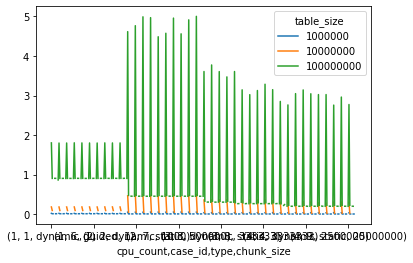

In [9]:
pv.plot()

In [10]:
df = pd.read_csv('./results.csv')
df

,type,chunk_size,table_size,cpu_count,time
0,static,1000000,1000000,1,0.009775
1,dynamic,1,1000000,1,0.019312
2,dynamic,1000,1000000,1,0.009710
3,dynamic,1000000,1000000,1,0.009638
4,guided,1,1000000,1,0.009603
...,...,...,...,...,...
595,static,25000000,100000000,4,0.199405
596,dynamic,1,100000000,4,2.772308
597,dynamic,1000,100000000,4,0.223689
598,dynamic,25000000,100000000,4,0.200010


In [11]:
ag = df.groupby(['type','chunk_size', 'table_size', 'cpu_count']).mean()
ag

time
type    chunk_size table_size cpu_count          
dynamic 1          1000000    1          0.018542
                              2          0.049664
                              3          0.036345
                              4          0.034805
                   10000000   1          0.180750
                              2          0.479038
                              3          0.352999
                              4          0.296994
                   100000000  1          1.800648
                              2          4.783896
                              3          3.378900
                              4          2.938436
        1000       1000000    1          0.009657
                              2          0.005308
                              3          0.003620
                              4          0.002861
                   10000000   1          0.091367
                              2          0.047852
                              3          0.033300
                              4          0.022919
                   100000000  1          0.904378
                              2          0.472698
                              3          0.303136
                              4          0.227418
        250000     1000000    4          0.002864
        333333     1000000    3          0.003646
        500000     1000000    2          0.005234
        1000000    1000000    1          0.009656
        2500000    10000000   4          0.020628
        3333333    10000000   3          0.031025
        5000000    10000000   2          0.046041
        10000000   10000000   1          0.091349
        25000000   100000000  4          0.202176
        33333333   100000000  3          0.280133
        50000000   100000000  2          0.452993
        100000000  100000000  1          0.904511
guided  1          1000000    1          0.009728
                              2          0.004977
                              3          0.003497
                              4          0.002723
                   10000000   1          0.091344
                              2          0.045933
                              3          0.030800
                              4          0.020383
                   100000000  1          0.904639
                              2          0.452664
                              3          0.280867
                              4          0.202973
static  250000     1000000    4          0.002800
        333333     1000000    3          0.003649
        500000     1000000    2          0.005143
        1000000    1000000    1          0.009799
        2500000    10000000   4          0.020806
        3333333    10000000   3          0.030829
        5000000    10000000   2          0.045902
        10000000   10000000   1          0.090883
        25000000   100000000  4          0.200549
        33333333   100000000  3          0.283427
        50000000   100000000  2          0.451493
        100000000  100000000  1          0.898122

<AxesSubplot:title={'center':'Time'}, xlabel='cpu_count'>

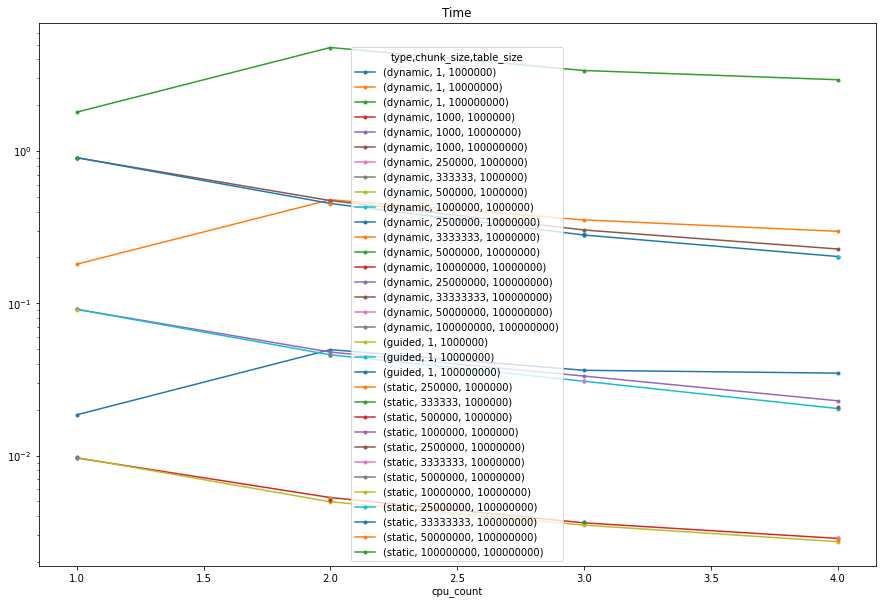

In [12]:
ag.reset_index().pivot(index='cpu_count', values='time', columns=['type','chunk_size','table_size']).plot(logy=True,figsize=(15,10), title="Time", style='.-')

In [13]:
df = pd.read_csv('./results.csv')
df

,type,chunk_size,table_size,cpu_count,time
0,static,1000000,1000000,1,0.009775
1,dynamic,1,1000000,1,0.019312
2,dynamic,1000,1000000,1,0.009710
3,dynamic,1000000,1000000,1,0.009638
4,guided,1,1000000,1,0.009603
...,...,...,...,...,...
595,static,25000000,100000000,4,0.199405
596,dynamic,1,100000000,4,2.772308
597,dynamic,1000,100000000,4,0.223689
598,dynamic,25000000,100000000,4,0.200010


In [14]:
def get_type(name):
    return df[df.type==name].drop(columns=['type'])

In [15]:
guided = get_type('guided')
guided

,chunk_size,table_size,cpu_count,time
4,1,1000000,1,0.009603
9,1,1000000,1,0.009661
14,1,1000000,1,0.009614
19,1,1000000,1,0.009610
24,1,1000000,1,0.009622
...,...,...,...,...
579,1,100000000,4,0.198776
584,1,100000000,4,0.199137
589,1,100000000,4,0.198985
594,1,100000000,4,0.198977


In [16]:
static = get_type('static')
static

,chunk_size,table_size,cpu_count,time
0,1000000,1000000,1,0.009775
5,1000000,1000000,1,0.010476
10,1000000,1000000,1,0.009608
15,1000000,1000000,1,0.009576
20,1000000,1000000,1,0.009598
...,...,...,...,...
575,25000000,100000000,4,0.200759
580,25000000,100000000,4,0.198140
585,25000000,100000000,4,0.199925
590,25000000,100000000,4,0.198017


In [17]:
dynamic = get_type('dynamic')
dynamic

,chunk_size,table_size,cpu_count,time
1,1,1000000,1,0.019312
2,1000,1000000,1,0.009710
3,1000000,1000000,1,0.009638
6,1,1000000,1,0.018496
7,1000,1000000,1,0.009643
...,...,...,...,...
592,1000,100000000,4,0.224468
593,25000000,100000000,4,0.199222
596,1,100000000,4,2.772308
597,1000,100000000,4,0.223689


<AxesSubplot:title={'center':'Time (s): Guided Scheduling'}, xlabel='cpu_count'>

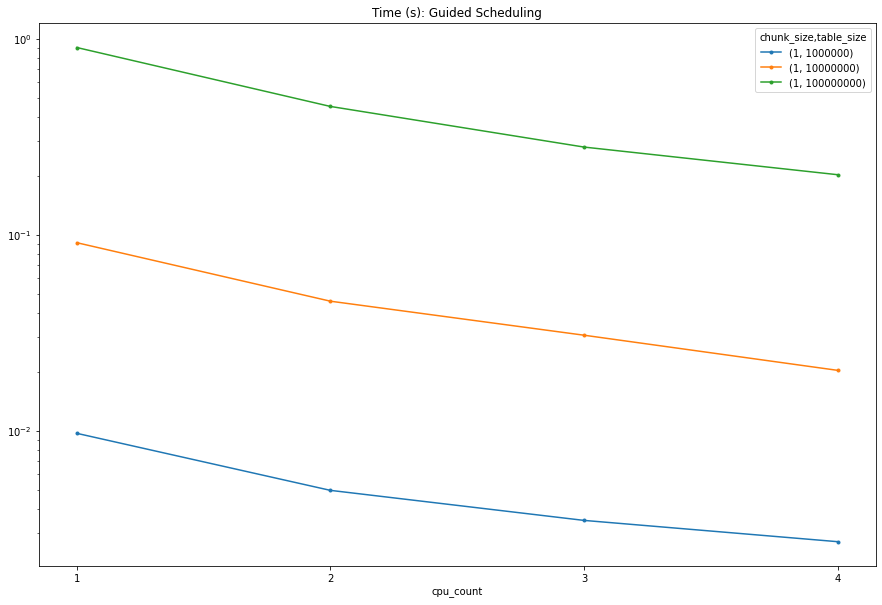

In [26]:
guided.reset_index() \
.groupby(['chunk_size', 'table_size', 'cpu_count']).mean().reset_index() \
.pivot(index='cpu_count', values='time', columns=['chunk_size','table_size']) \
.plot(logy=True,figsize=(15,10), title="Time (s): Guided Scheduling", style='.-', xticks=range(1,5))

<AxesSubplot:title={'center':'Time (s): Dynamic Scheduling'}, xlabel='cpu_count'>

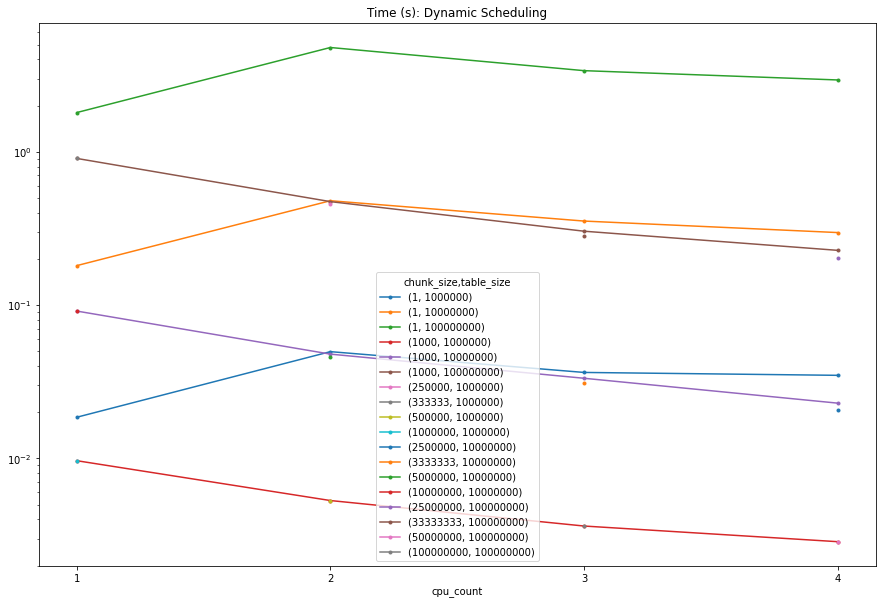

In [25]:
dynamic.reset_index() \
.groupby(['chunk_size', 'table_size', 'cpu_count']).mean().reset_index() \
.pivot(index='cpu_count', values='time', columns=['chunk_size','table_size']) \
.plot(logy=True,figsize=(15,10), title="Time (s): Dynamic Scheduling", style='.-', xticks=range(1,5))

In [43]:
a = dynamic.reset_index() \
.groupby(['chunk_size', 'table_size', 'cpu_count']).mean().reset_index() \

# a[a.chunk_size == a.table_size // a.cpu_count].chunk_size = 1/3
# a[a.chunk_size == a.table_size // a.cpu_count].chunk_size = 1/3

a.loc[a.chunk_size == a.table_size // a.cpu_count, 'chunk_size'] = 'table_size / cpu_count'
a

# .pivot(index='cpu_count', values='time', columns=['chunk_size','table_size']) \
# .plot(logy=True,figsize=(15,10), title="Time (s): Dynamic Scheduling", style='.-', xticks=range(1,5))

,chunk_size,table_size,cpu_count,index,time
0,1,1000000,1,23.5,0.018542
1,1,1000000,2,73.5,0.049664
2,1,1000000,3,123.5,0.036345
3,1,1000000,4,173.5,0.034805
4,1,10000000,1,223.5,0.180750
5,1,10000000,2,273.5,0.479038
6,1,10000000,3,323.5,0.352999
7,1,10000000,4,373.5,0.296994
8,1,100000000,1,423.5,1.800648
9,1,100000000,2,473.5,4.783896


<AxesSubplot:title={'center':'Time (s): Dynamic Scheduling'}, xlabel='cpu_count'>

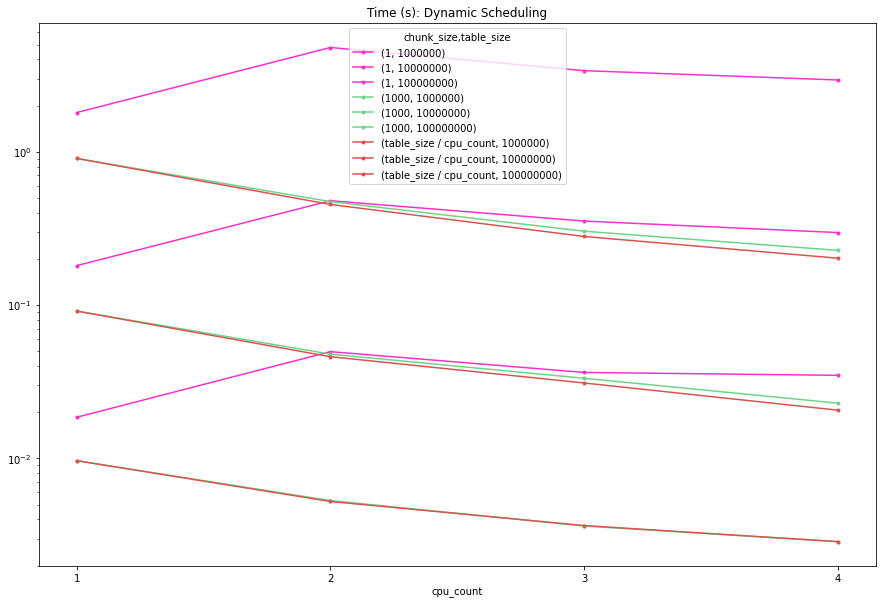

In [57]:
color_dict = {'table_size / cpu_count': '#D9534F', 1000: '#6DD588', 1: '#FB2FCC'}
b = a.pivot(index='cpu_count', values='time', columns=['chunk_size','table_size'])

b.plot(logy=True,figsize=(15,10), title="Time (s): Dynamic Scheduling", style='.-', xticks=range(
    1,5),
      color=[color_dict.get(x[0], '#333333') for x in b.columns])

In [20]:
static

,chunk_size,table_size,cpu_count,time
0,1000000,1000000,1,0.009775
5,1000000,1000000,1,0.010476
10,1000000,1000000,1,0.009608
15,1000000,1000000,1,0.009576
20,1000000,1000000,1,0.009598
...,...,...,...,...
575,25000000,100000000,4,0.200759
580,25000000,100000000,4,0.198140
585,25000000,100000000,4,0.199925
590,25000000,100000000,4,0.198017


In [21]:
static.reset_index() \
.groupby(['chunk_size', 'table_size', 'cpu_count']).mean().reset_index()

,chunk_size,table_size,cpu_count,index,time
0,250000,1000000,4,172.5,0.002800
1,333333,1000000,3,122.5,0.003649
2,500000,1000000,2,72.5,0.005143
3,1000000,1000000,1,22.5,0.009799
4,2500000,10000000,4,372.5,0.020806
5,3333333,10000000,3,322.5,0.030829
6,5000000,10000000,2,272.5,0.045902
7,10000000,10000000,1,222.5,0.090883
8,25000000,100000000,4,572.5,0.200549
9,33333333,100000000,3,522.5,0.283427


<AxesSubplot:title={'center':'Time (s): Static Scheduling'}, xlabel='cpu_count'>

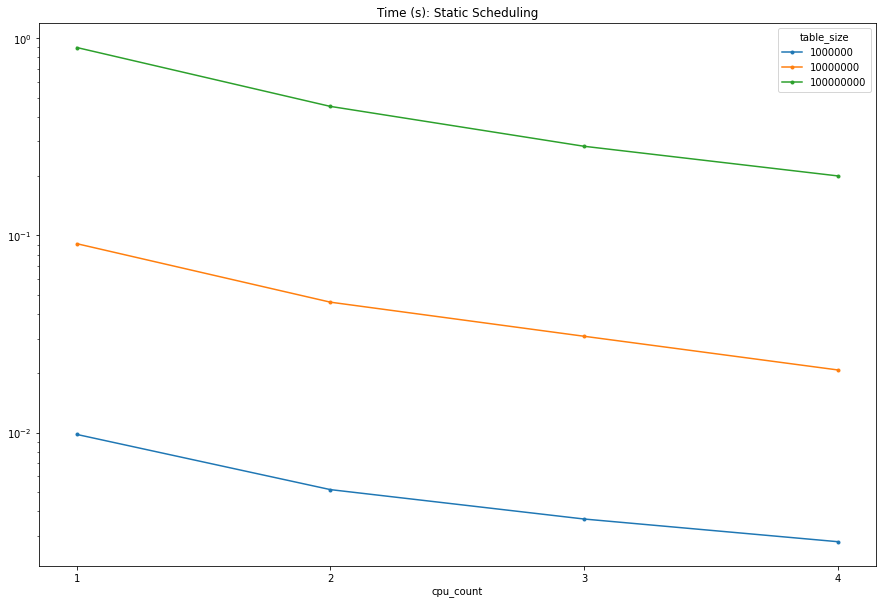

In [24]:
static.reset_index() \
.groupby(['chunk_size', 'table_size', 'cpu_count']).mean().reset_index().drop(columns=['chunk_size']) \
.pivot(index='cpu_count', values='time', columns=['table_size']) \
.plot(logy=True,figsize=(15,10), title="Time (s): Static Scheduling", style='.-', xticks=range(1,5))